# LASSO regression to predict TCR clonality change using pre-treatmnet samples

In [1]:
setwd("~/Documents/PhD/Software/Scripts/OVCT/R_scripts/LASSO/OVCTk_TCR/")

In [3]:
install.packages("glmnet", repos = "http://cran.us.r-project.org")

also installing the dependencies ‘iterators’, ‘foreach’




The downloaded binary packages are in
	/var/folders/0x/_9tqxlf13mq9dnj3mvt0kr94vsllz0/T//RtmpSWpKpy/downloaded_packages


In [4]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



# Load normalized enrichment scores data

In [5]:
dataH<-read.table('OVCTk_clin_expHallmarks_tcr2.txt',sep='\t',header=T,row.names='ID')
dataC<-read.table('OVCTk_clin_expCells_tcr2.txt',sep='\t',header=T,row.names='ID')

In [8]:
d<-merge(dataH,dataC)

In [66]:
d

clon_dif,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,⋯,fhelper,fibroblast,m0,m1,m2,mast,monocytes,neutrophils,nk,plasma_cells
-0.05367598,0.10037598,0.1656335,0.2934478,0.2984587,0.2430485,0.2684412,0.06811437,0.2901997,0.3023870,⋯,-0.20045622,0.1919534,0.2007594,0.09786762,0.17643208,0.033799239,0.1881507,0.25076800,-0.06344363,0.2704770
0.13568710,0.12746932,0.2080497,0.3078805,0.3723589,0.2508322,0.2733802,0.14162193,0.3313310,0.4209907,⋯,-0.24256832,0.3770697,0.1638082,0.22135702,0.11975616,-0.204514791,0.1311928,0.18122206,-0.10712066,0.3683446
0.14493776,0.26950706,0.2674401,0.3029803,0.3161044,0.2098915,0.3632646,0.22420808,0.3001078,0.3317444,⋯,-0.00154837,0.3284471,0.2950352,0.29618340,0.29028868,0.021653758,0.2821309,0.29213481,0.07957779,0.4728131
0.30162732,0.22117278,0.2147640,0.2849992,0.2937372,0.2119906,0.3234169,0.21946426,0.2795503,0.2719322,⋯,0.01513607,0.3672276,0.3128782,0.25562592,0.21029309,-0.016836548,0.2973076,0.21184604,0.02655610,0.3920969
0.57524735,0.16269765,0.1989115,0.3497781,0.2696973,0.2008035,0.2892402,0.13615196,0.2733981,0.3465497,⋯,-0.24963204,0.2211098,0.2146110,0.18500361,0.11124594,-0.090437412,0.1630460,0.14753305,-0.12463533,0.1379532
0.68871043,0.10006643,0.1929547,0.3212259,0.2787695,0.2524295,0.2752329,0.08043667,0.2867159,0.3446391,⋯,-0.24598670,0.2223095,0.1257717,0.08827739,0.11357447,-0.202748727,0.1490137,0.20811456,-0.09413428,0.2057751
0.82121647,0.09243975,0.1857720,0.2551130,0.3050709,0.2184994,0.3190013,0.06305822,0.2830261,0.3660479,⋯,-0.16985730,0.2633907,0.1639361,0.11905623,0.09578078,-0.069285484,0.1785481,0.08388038,-0.05542339,0.2628897
1.13781465,0.10377900,0.2100650,0.3287102,0.3400930,0.2716443,0.3247757,0.14270194,0.3538589,0.4133252,⋯,-0.19152789,0.2875400,0.1859688,0.20275472,0.15009762,-0.002007432,0.1901387,0.22665547,-0.09803644,0.2730468


# Select explanatory and response variables

In [9]:
x<-as.matrix(subset(d, select = -c(clon_dif)))
y<-as.matrix(d$clon_dif)

# Check reponse distribution

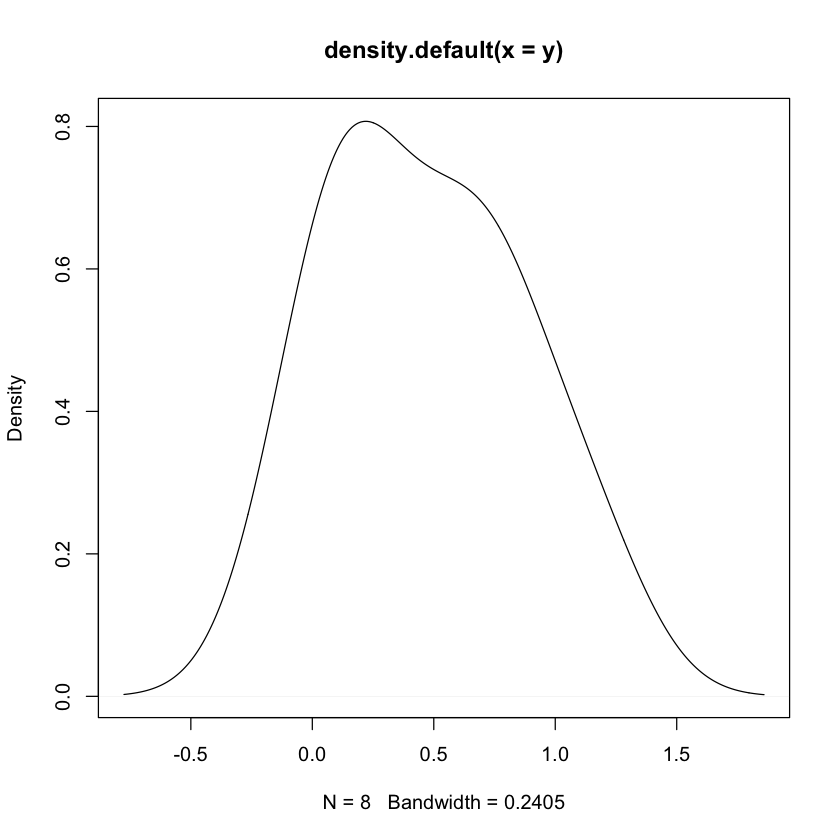

In [39]:
plot(density(y)) # the data is log2(t1/t0)

In [40]:
# Check normality of data
shapiro.test(y)


	Shapiro-Wilk normality test

data:  y
W = 0.9573, p-value = 0.784


# Linear lasso gaussian regression

In [11]:
fit<-glmnet(x,y,family='gaussian',alpha=1,standardize=T)

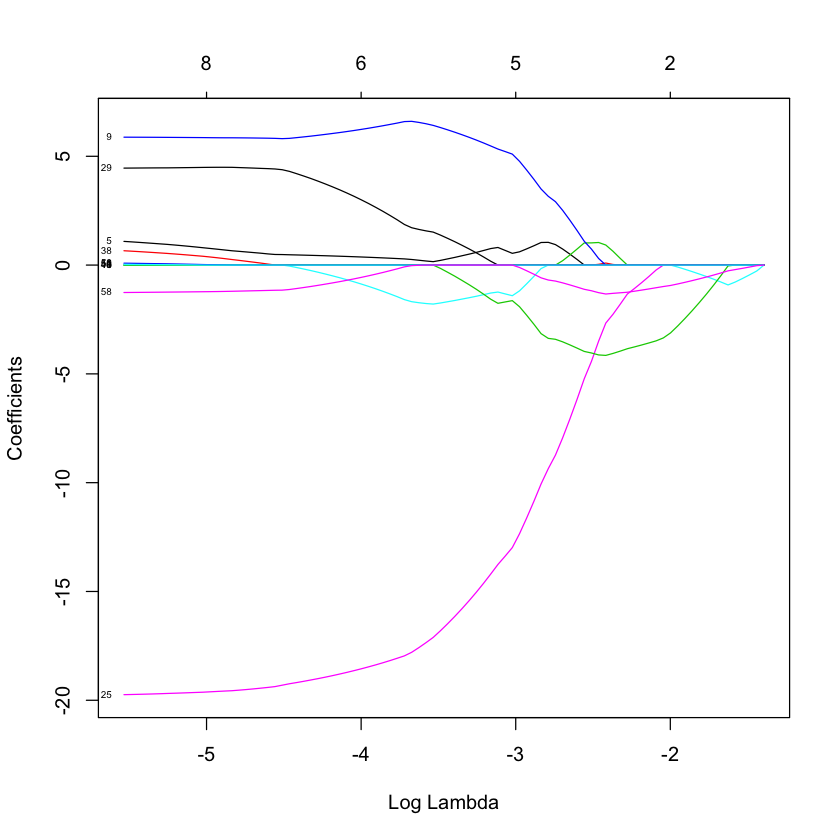

In [12]:
plot(fit,xvar='lambda',label=TRUE)

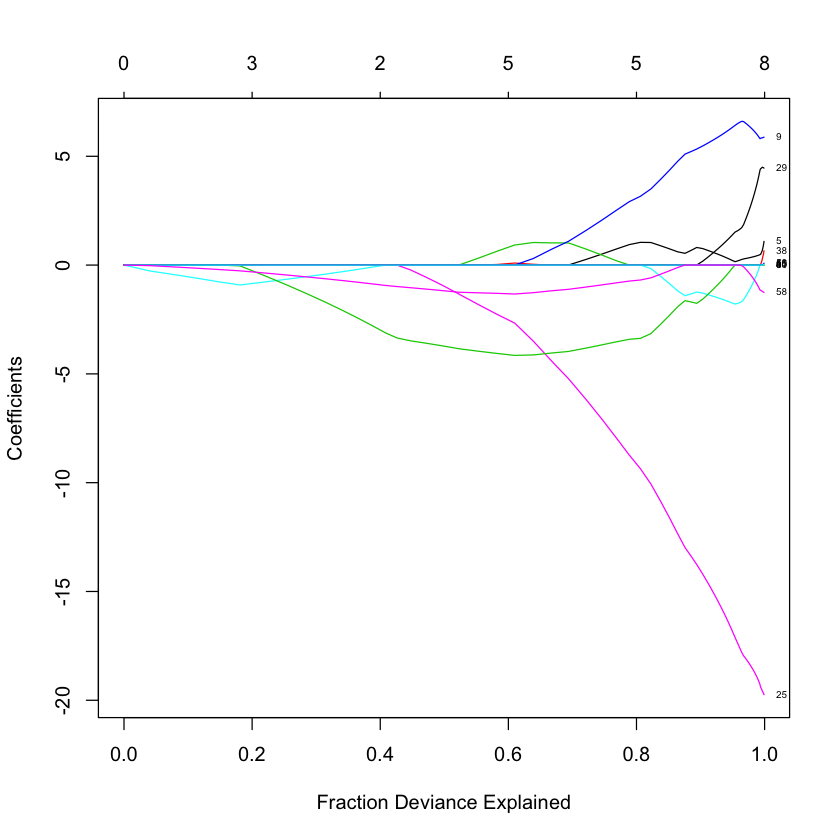

In [13]:
plot(fit,xvar='dev',label=TRUE)

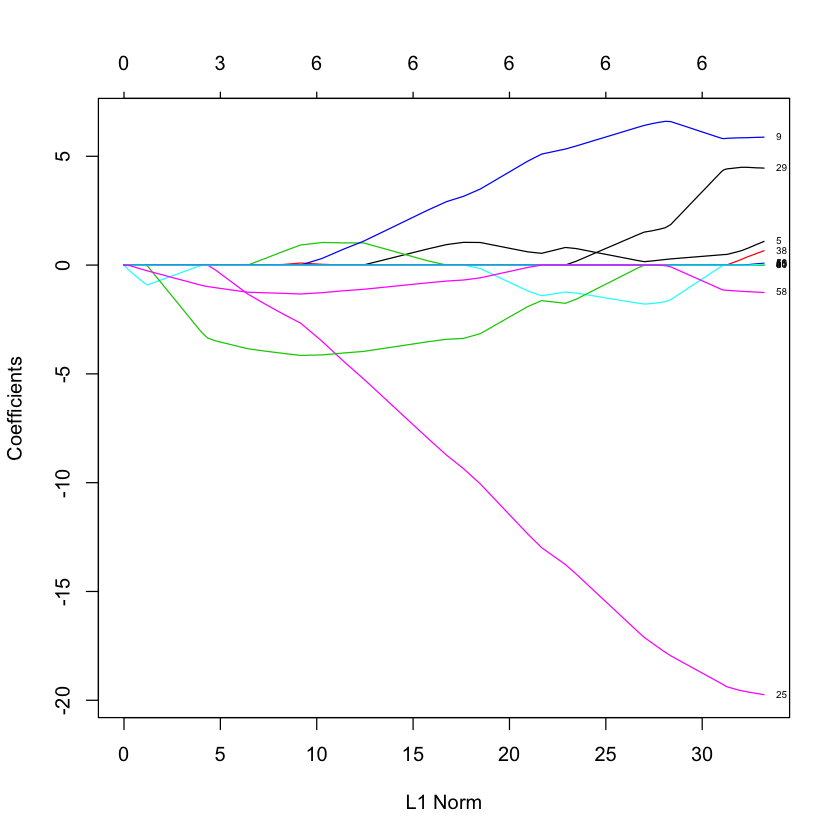

In [68]:
plot(fit,label=T)

In [15]:
colnames(x)[25]

[1] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"

In [16]:
colnames(x)[9]

[1] "HALLMARK_G2M_CHECKPOINT"

In [41]:
colnames(x)[29]

[1] "HALLMARK_MYC_TARGETS_V2"

In [42]:
colnames(x)[5]

[1] "HALLMARK_WNT_BETA_CATENIN_SIGNALING"

In [43]:
colnames(x)[38]

[1] "HALLMARK_UV_RESPONSE_UP"

In [44]:
colnames(x)[58]

[1] "cytotoxic"

In [ ]:
# Selecting lambda below is not trivial, if I use lambda = 0.05 I get the following

In [70]:
coef(fit,s=0.05, exact = FALSE)

72 x 1 sparse Matrix of class "dgCMatrix"
                                                      1
(Intercept)                                  2.87994181
HALLMARK_TNFA_SIGNALING_VIA_NFKB             .         
HALLMARK_HYPOXIA                             .         
HALLMARK_CHOLESTEROL_HOMEOSTASIS             .         
HALLMARK_MITOTIC_SPINDLE                     .         
HALLMARK_WNT_BETA_CATENIN_SIGNALING          0.57899370
HALLMARK_TGF_BETA_SIGNALING                  .         
HALLMARK_IL6_JAK_STAT3_SIGNALING             .         
HALLMARK_DNA_REPAIR                          .         
HALLMARK_G2M_CHECKPOINT                      4.91514536
HALLMARK_APOPTOSIS                          -1.28295138
HALLMARK_NOTCH_SIGNALING                     .         
HALLMARK_ADIPOGENESIS                        .         
HALLMARK_ESTROGEN_RESPONSE_EARLY             .         
HALLMARK_ESTROGEN_RESPONSE_LATE              .         
HALLMARK_ANDROGEN_RESPONSE                   .         
HALLMA

In [59]:
?cv.glmnet

In [62]:
cvfit=cv.glmnet(x,y,family="gaussian",type.measure="mse",alpha=1,nfold=10) # type.measure can be mae

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

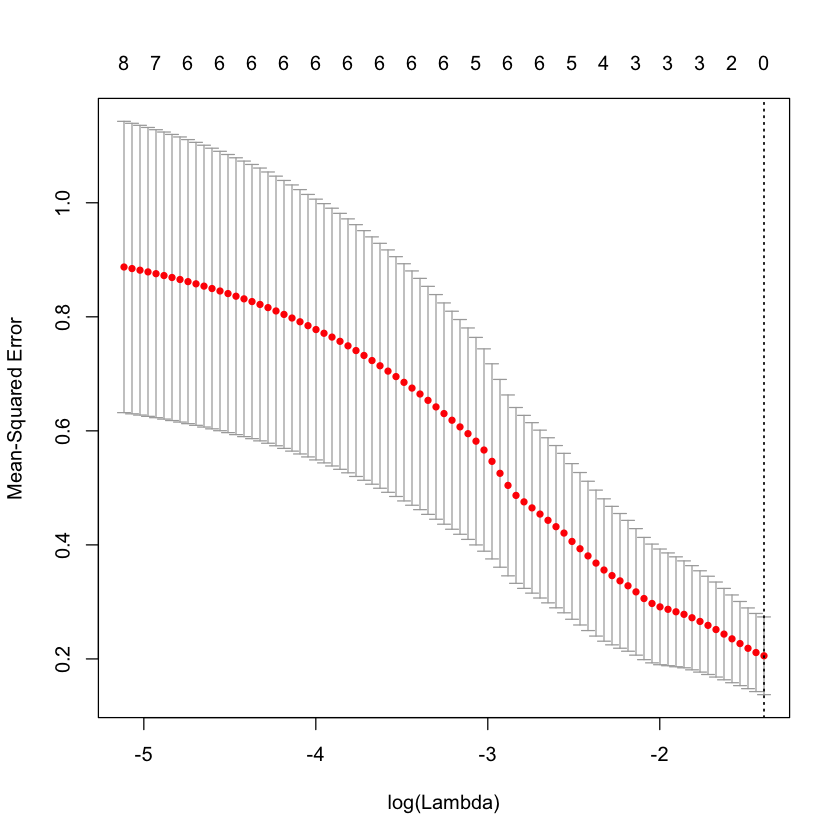

In [63]:
plot(cvfit)

In [64]:
cvfit$lambda.min

[1] 0.2480904

In [65]:
coef(cvfit, s = "lambda.min") # no variable is selected using lambda.min

72 x 1 sparse Matrix of class "dgCMatrix"
                                                   1
(Intercept)                                0.4689456
HALLMARK_TNFA_SIGNALING_VIA_NFKB           .        
HALLMARK_HYPOXIA                           .        
HALLMARK_CHOLESTEROL_HOMEOSTASIS           .        
HALLMARK_MITOTIC_SPINDLE                   .        
HALLMARK_WNT_BETA_CATENIN_SIGNALING        .        
HALLMARK_TGF_BETA_SIGNALING                .        
HALLMARK_IL6_JAK_STAT3_SIGNALING           .        
HALLMARK_DNA_REPAIR                        .        
HALLMARK_G2M_CHECKPOINT                    .        
HALLMARK_APOPTOSIS                         .        
HALLMARK_NOTCH_SIGNALING                   .        
HALLMARK_ADIPOGENESIS                      .        
HALLMARK_ESTROGEN_RESPONSE_EARLY           .        
HALLMARK_ESTROGEN_RESPONSE_LATE            .        
HALLMARK_ANDROGEN_RESPONSE                 .        
HALLMARK_MYOGENESIS                        .        
HALL

# 100 crossvalidation cycles to select lambda min

In [18]:
# initialize vector for final data.frame with Mean Standard Errors
MSEs<-NULL

In [19]:
for (i in 1:100){
  cv<-cv.glmnet(x,y,family="gaussian",type.measure="mse",alpha=1,nfold=10,grouped=F) # type.measure can be mae too
  MSEs<-cbind(MSEs, cv$cvm)
}

In [20]:
# take the average of the mean error curves
rownames(MSEs) <- cv$lambda
lambda.min <- as.numeric(names(which.min(rowMeans(MSEs))))

In [21]:
lambda.min # same lambda as above, so no variable is selected

[1] 0.2480904

In [22]:
cvfit=cv.glmnet(x,y,family="gaussian",type.measure="mse",alpha=1,nfold=10) # type.measure can be mae too

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

In [23]:
cvfit$lambda.min

[1] 0.2480904

In [24]:
coef(cvfit, s = lambda.min)

72 x 1 sparse Matrix of class "dgCMatrix"
                                                   1
(Intercept)                                0.4689456
HALLMARK_TNFA_SIGNALING_VIA_NFKB           .        
HALLMARK_HYPOXIA                           .        
HALLMARK_CHOLESTEROL_HOMEOSTASIS           .        
HALLMARK_MITOTIC_SPINDLE                   .        
HALLMARK_WNT_BETA_CATENIN_SIGNALING        .        
HALLMARK_TGF_BETA_SIGNALING                .        
HALLMARK_IL6_JAK_STAT3_SIGNALING           .        
HALLMARK_DNA_REPAIR                        .        
HALLMARK_G2M_CHECKPOINT                    .        
HALLMARK_APOPTOSIS                         .        
HALLMARK_NOTCH_SIGNALING                   .        
HALLMARK_ADIPOGENESIS                      .        
HALLMARK_ESTROGEN_RESPONSE_EARLY           .        
HALLMARK_ESTROGEN_RESPONSE_LATE            .        
HALLMARK_ANDROGEN_RESPONSE                 .        
HALLMARK_MYOGENESIS                        .        
HALL

# So one option is to select the variables based on plots 12 and 13, correct?

# Since I want to know if the variables explain the response variable significantly, and how much I do Multiple linear regression (?)

In [72]:
m1<-lm(clon_dif~cytotoxic+HALLMARK_PI3K_AKT_MTOR_SIGNALING+
       HALLMARK_G2M_CHECKPOINT+HALLMARK_MYC_TARGETS_V2+HALLMARK_WNT_BETA_CATENIN_SIGNALING+
       HALLMARK_UV_RESPONSE_UP,data=d)
summary(m1)


Call:
lm(formula = clon_dif ~ cytotoxic + HALLMARK_PI3K_AKT_MTOR_SIGNALING + 
    HALLMARK_G2M_CHECKPOINT + HALLMARK_MYC_TARGETS_V2 + HALLMARK_WNT_BETA_CATENIN_SIGNALING + 
    HALLMARK_UV_RESPONSE_UP, data = d)

Residuals:
        1         2         3         4         5         6         7         8 
-0.004719  0.002786  0.000979  0.003262 -0.009318  0.003823  0.007688 -0.004500 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                           1.9459     0.2201   8.840   0.0717 .
cytotoxic                            -1.3895     0.2078  -6.686   0.0945 .
HALLMARK_PI3K_AKT_MTOR_SIGNALING    -19.9924     0.7872 -25.398   0.0251 *
HALLMARK_G2M_CHECKPOINT               5.8318     0.4521  12.900   0.0493 *
HALLMARK_MYC_TARGETS_V2               4.7651     0.4118  11.572   0.0549 .
HALLMARK_WNT_BETA_CATENIN_SIGNALING   1.2293     0.3995   3.077   0.2000  
HALLMARK_UV_RESPONSE_UP               1.1255     0.4870   2.311   0.2600 

In [73]:
sm1<-step(m1)

Start:  AIC=-69.92
clon_dif ~ cytotoxic + HALLMARK_PI3K_AKT_MTOR_SIGNALING + HALLMARK_G2M_CHECKPOINT + 
    HALLMARK_MYC_TARGETS_V2 + HALLMARK_WNT_BETA_CATENIN_SIGNALING + 
    HALLMARK_UV_RESPONSE_UP

                                      Df Sum of Sq      RSS     AIC
<none>                                             0.000222 -69.923
- HALLMARK_UV_RESPONSE_UP              1  0.001188 0.001411 -57.145
- HALLMARK_WNT_BETA_CATENIN_SIGNALING  1  0.002106 0.002328 -53.136
- cytotoxic                            1  0.009943 0.010166 -41.345
- HALLMARK_MYC_TARGETS_V2              1  0.029788 0.030011 -32.685
- HALLMARK_G2M_CHECKPOINT              1  0.037013 0.037236 -30.959
- HALLMARK_PI3K_AKT_MTOR_SIGNALING     1  0.143483 0.143705 -20.155


In [74]:
summary(sm1)


Call:
lm(formula = clon_dif ~ cytotoxic + HALLMARK_PI3K_AKT_MTOR_SIGNALING + 
    HALLMARK_G2M_CHECKPOINT + HALLMARK_MYC_TARGETS_V2 + HALLMARK_WNT_BETA_CATENIN_SIGNALING + 
    HALLMARK_UV_RESPONSE_UP, data = d)

Residuals:
        1         2         3         4         5         6         7         8 
-0.004719  0.002786  0.000979  0.003262 -0.009318  0.003823  0.007688 -0.004500 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                           1.9459     0.2201   8.840   0.0717 .
cytotoxic                            -1.3895     0.2078  -6.686   0.0945 .
HALLMARK_PI3K_AKT_MTOR_SIGNALING    -19.9924     0.7872 -25.398   0.0251 *
HALLMARK_G2M_CHECKPOINT               5.8318     0.4521  12.900   0.0493 *
HALLMARK_MYC_TARGETS_V2               4.7651     0.4118  11.572   0.0549 .
HALLMARK_WNT_BETA_CATENIN_SIGNALING   1.2293     0.3995   3.077   0.2000  
HALLMARK_UV_RESPONSE_UP               1.1255     0.4870   2.311   0.2600 

In [75]:
m2<-lm(clon_dif~cytotoxic+HALLMARK_PI3K_AKT_MTOR_SIGNALING+
       HALLMARK_G2M_CHECKPOINT+HALLMARK_MYC_TARGETS_V2+HALLMARK_WNT_BETA_CATENIN_SIGNALING,data=d)
summary(m2)


Call:
lm(formula = clon_dif ~ cytotoxic + HALLMARK_PI3K_AKT_MTOR_SIGNALING + 
    HALLMARK_G2M_CHECKPOINT + HALLMARK_MYC_TARGETS_V2 + HALLMARK_WNT_BETA_CATENIN_SIGNALING, 
    data = d)

Residuals:
        1         2         3         4         5         6         7         8 
-0.021438  0.008445  0.001476  0.008609 -0.001147  0.024394 -0.010443 -0.009898 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)                           2.3852     0.1976  12.070  0.00679 **
cytotoxic                            -1.0763     0.2806  -3.836  0.06174 . 
HALLMARK_PI3K_AKT_MTOR_SIGNALING    -21.2811     0.9894 -21.509  0.00215 **
HALLMARK_G2M_CHECKPOINT               6.5103     0.6122  10.634  0.00873 **
HALLMARK_MYC_TARGETS_V2               4.7179     0.7323   6.442  0.02326 * 
HALLMARK_WNT_BETA_CATENIN_SIGNALING   0.7285     0.5977   1.219  0.34714   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

In [76]:
m3<-lm(clon_dif~cytotoxic+HALLMARK_PI3K_AKT_MTOR_SIGNALING+
       HALLMARK_G2M_CHECKPOINT+HALLMARK_MYC_TARGETS_V2,data=d)
summary(m3)


Call:
lm(formula = clon_dif ~ cytotoxic + HALLMARK_PI3K_AKT_MTOR_SIGNALING + 
    HALLMARK_G2M_CHECKPOINT + HALLMARK_MYC_TARGETS_V2, data = d)

Residuals:
        1         2         3         4         5         6         7         8 
-0.014720  0.013221 -0.011409  0.022337 -0.016871  0.024785 -0.022610  0.005268 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        2.3420     0.2096  11.176 0.001535 ** 
cytotoxic                         -1.2221     0.2736  -4.466 0.020913 *  
HALLMARK_PI3K_AKT_MTOR_SIGNALING -20.8630     1.0003 -20.856 0.000241 ***
HALLMARK_G2M_CHECKPOINT            6.3676     0.6478   9.830 0.002238 ** 
HALLMARK_MYC_TARGETS_V2            5.2403     0.6400   8.188 0.003812 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02863 on 3 degrees of freedom
Multiple R-squared:  0.9979,	Adjusted R-squared:  0.995 
F-statistic: 349.5 on 4 and 3 DF,  p-valu

In [77]:
AIC(m1,m2,m3)

,df,AIC
m1,8,-45.21963
m2,7,-32.44245
m3,6,-29.99835


In [78]:
BIC(m1,m2,m3)

,df,BIC
m1,8,-44.58409
m2,7,-31.88636
m3,6,-29.52170


# Seems like best model is m1

In [79]:
# And we have a crazy adj. R-squared of 0.9986 which makes me think, there must be something fishi afetr our conversation on Friday

# End